In [1]:
import sys
sys.version

'2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as sp
import nltk
#Import's all the data and visualization libary's. Will import learning libaries as needed.

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#import the data into dataframes

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()
# Notice the differnce in the count of values. I will need to do some imputation.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Performed a t-test to tell if Passenger class makes a difference for someone who survives.  
pclass1=train[train["Pclass"]==1]["Survived"]
pclass2=train[train["Pclass"]==2]["Survived"]

result=sp.ttest_ind(pclass1,pclass2)
print (result)

Ttest_indResult(statistic=3.1786140523324851, pvalue=0.0015954656668372637)


In [7]:
test.describe()
# Again notice the differnce in the count of values. I will need to do some imputation.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


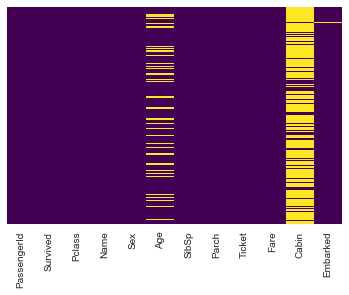

In [8]:
#heatmap to look at missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

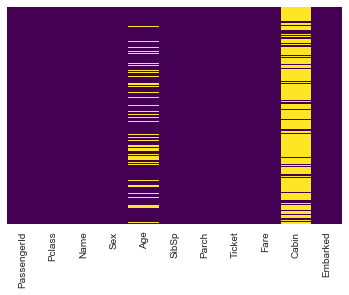

In [9]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
"""To many null values for cabin to keep it in the model. I can impute age and begin feature engieering. Normally  I  
 would explore my data in Tableau but for this exercise I will use seaborn and matplotlib.

Also Cabin has so many missing features that I am replacing it with is Null"""
train['Cabin_known'] = train['Cabin'].isnull() == False
test['Cabin_known'] = test['Cabin'].isnull() == False
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

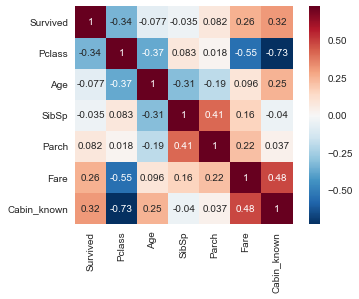

In [11]:
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)
#correlation matrix to avoid multicorrelinearity

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[train['Pclass']==3]['Age'].mean()

        elif Pclass == 2:
            return train[train['Pclass']==2]['Age'].mean()

        else:
            return train[train['Pclass']==3]['Age'].mean()

    else:
        return Age
    

In [13]:
#impute the average age for the passenger class

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

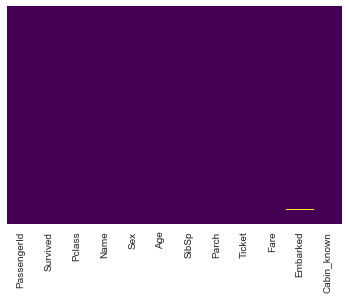

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

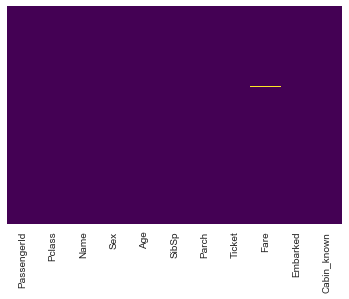

In [16]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# drop the only null value in train then input the missing value in test. Using 
train.dropna(inplace=True)
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return train[train['Pclass']==3]['Fare'].median()

        elif Pclass == 2:
            return train[train['Pclass']==2]['Fare'].median()

        else:
            return train[train['Pclass']==3]['Fare'].median()

    else:
        return Fare
    

In [18]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)

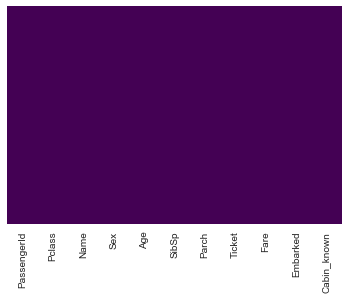

In [19]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

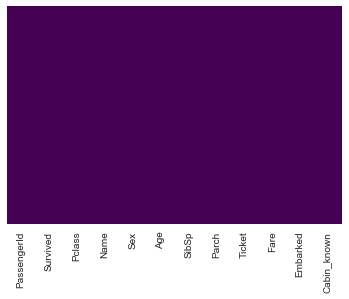

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
#Time for more feature engineering. I am going to get rid of the categorical variables and create dummy variables so 
# the model to be able to read it.  
train['NamePrefix'] = train.Name.apply(lambda x: x.split(' ')[1])
test['NamePrefix'] = test.Name.apply(lambda x: x.split(' ')[1])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr.


In [22]:
type(train)
train['Family Size']=train['Parch']+train['SibSp']+1
test['Family Size']=test['Parch']+test['SibSp']+1

In [23]:
#bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
#group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
bins=(0,12,120)
group_names=['Child','Adult']
categories1 = pd.cut(train['Age'], bins, labels=group_names)
train['Age'] = categories1

In [24]:
#bins1 = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
#group_names2 = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
bins1=(0,12,120)
group_names2=['Child','Adult']
categories2 = pd.cut(test["Age"], bins1, labels=group_names2)
test['Age'] = categories2

In [25]:
test.head(500)
#test.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,NamePrefix,Family Size
0,892,3,"Kelly, Mr. James",male,Adult,0,0,330911,7.8292,Q,False,Mr.,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Adult,1,0,363272,7.0000,S,False,Mrs.,2
2,894,2,"Myles, Mr. Thomas Francis",male,Adult,0,0,240276,9.6875,Q,False,Mr.,1
3,895,3,"Wirz, Mr. Albert",male,Adult,0,0,315154,8.6625,S,False,Mr.,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Adult,1,1,3101298,12.2875,S,False,Mrs.,3
5,897,3,"Svensson, Mr. Johan Cervin",male,Adult,0,0,7538,9.2250,S,False,Mr.,1
6,898,3,"Connolly, Miss. Kate",female,Adult,0,0,330972,7.6292,Q,False,Miss.,1
7,899,2,"Caldwell, Mr. Albert Francis",male,Adult,1,1,248738,29.0000,S,False,Mr.,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,Adult,0,0,2657,7.2292,C,False,Mrs.,1
9,901,3,"Davies, Mr. John Samuel",male,Adult,2,0,A/4 48871,24.1500,S,False,Mr.,3


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
cabin=pd.get_dummies(train['Cabin_known'],drop_first=True,prefix='Cabin')
#prefix=pd.get_dummies(train['NamePrefix'],drop_first=True,prefix='Prefix')
age=pd.get_dummies(train['Age'],drop_first=True,prefix='Age_')
train = pd.concat([train,cabin,sex,embark,age],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,NamePrefix,Family Size,Cabin_True,male,Q,S,Age__Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,False,Mr.,2,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,True,Mrs.,2,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,False,Miss.,1,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,True,Mrs.,2,1,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,False,Mr.,1,0,1,0,1,1


In [27]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
cabin=pd.get_dummies(test['Cabin_known'],drop_first=True,prefix='Cabin')
#prefix=pd.get_dummies(test['NamePrefix'],drop_first=True,prefix='Prefix')
age=pd.get_dummies(test['Age'],drop_first=True,prefix='Age_')
test = pd.concat([test,cabin,sex,embark,age],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,NamePrefix,Family Size,Cabin_True,male,Q,S,Age__Adult
0,892,3,"Kelly, Mr. James",male,Adult,0,0,330911,7.8292,Q,False,Mr.,1,0,1,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Adult,1,0,363272,7.0000,S,False,Mrs.,2,0,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,Adult,0,0,240276,9.6875,Q,False,Mr.,1,0,1,1,0,1
3,895,3,"Wirz, Mr. Albert",male,Adult,0,0,315154,8.6625,S,False,Mr.,1,0,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Adult,1,1,3101298,12.2875,S,False,Mrs.,3,0,0,0,1,1


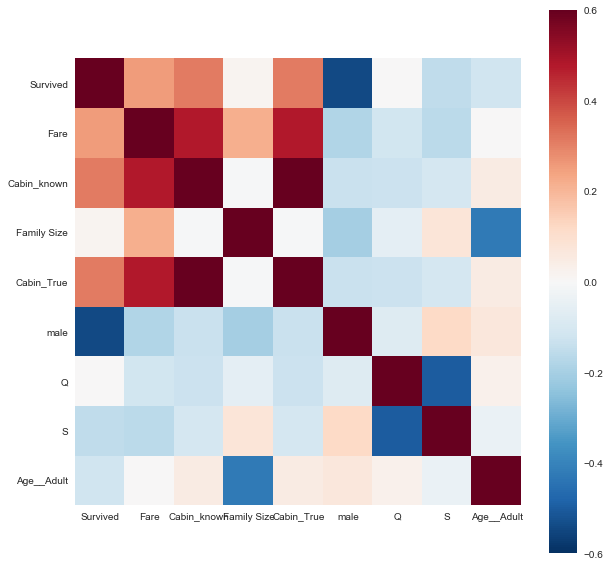

In [28]:
plt.subplots(figsize=(10,10))
sns.heatmap(train.drop(['PassengerId','Pclass','SibSp','Parch'],axis=1).corr(), vmax=0.6, square=True, annot=False)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known,NamePrefix,Family Size,Cabin_True,male,Q,S,Age__Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,False,Mr.,2,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,True,Mrs.,2,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,False,Miss.,1,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,True,Mrs.,2,1,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,False,Mr.,1,0,1,0,1,1


In [30]:
#get rid of extra varibles
train.drop(['Sex','Embarked','Name','Ticket',"Age",'SibSp','Parch','NamePrefix','Cabin_known'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket',"Age",'SibSp','Parch','NamePrefix','Cabin_known'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult
0,1,0,3,7.2500,2,0,1,0,1,1
1,2,1,1,71.2833,2,1,0,0,0,1
2,3,1,3,7.9250,1,0,0,0,1,1
3,4,1,1,53.1000,2,1,0,0,1,1
4,5,0,3,8.0500,1,0,1,0,1,1


In [32]:
train.describe()

,PassengerId,Survived,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,32.096681,1.906637,0.227222,0.649044,0.086614,0.724409,0.922385
std,256.998173,0.486260,0.834700,49.697504,1.614703,0.419273,0.477538,0.281427,0.447063,0.267716
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,668.000000,1.000000,3.000000,31.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
test.head()

,PassengerId,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult
0,892,3,7.8292,1,0,1,1,0,1
1,893,3,7.0000,2,0,0,0,1,1
2,894,2,9.6875,1,0,1,1,0,1
3,895,3,8.6625,1,0,1,0,1,1
4,896,3,12.2875,3,0,0,0,1,1


In [34]:
test.describe()

,PassengerId,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,35.561214,1.839713,0.217703,0.636364,0.110048,0.645933,0.940191
std,120.810458,0.841838,55.856789,1.519072,0.413179,0.481622,0.313324,0.478803,0.237416
min,892.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,31.471875,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1309.000000,3.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


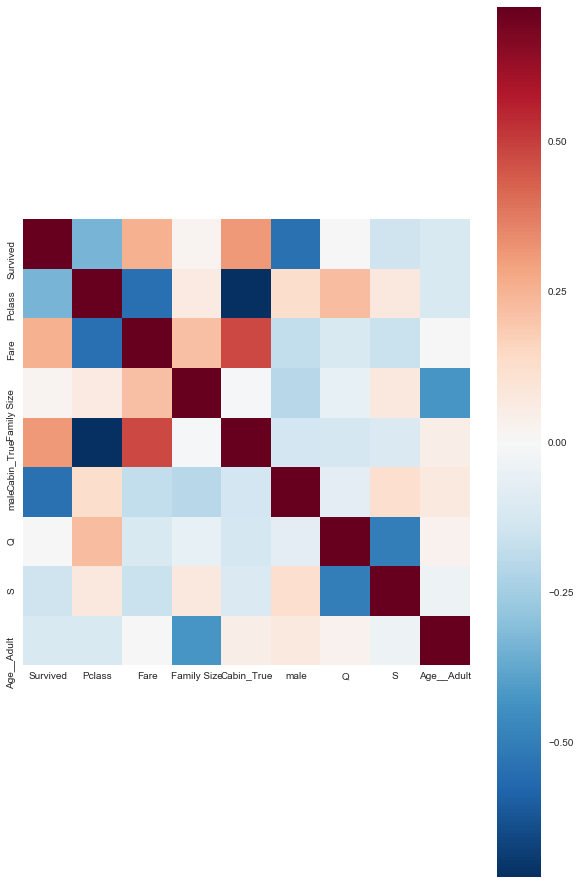

In [35]:
plt.figure(figsize=(10, 16))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, )
#correlation matrix to avoid multicorrelinearity

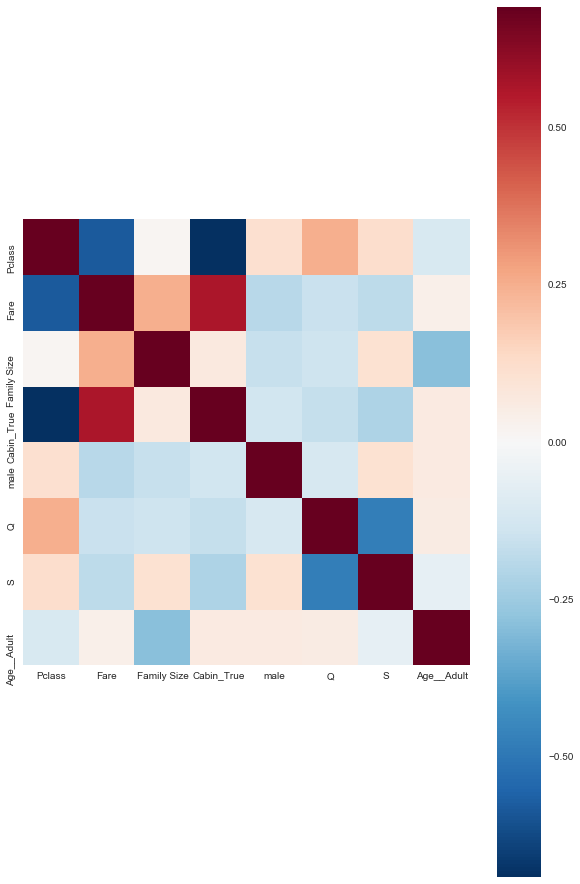

In [36]:
plt.figure(figsize=(10, 16))
sns.heatmap(test.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, )

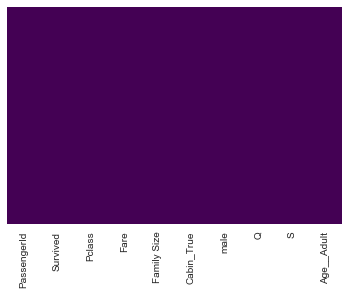

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

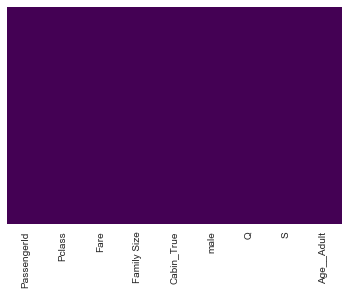

In [38]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
test=test[np.isfinite(test['PassengerId'])]
test.head(500)

,PassengerId,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult
0,892,3,7.8292,1,0,1,1,0,1
1,893,3,7.0000,2,0,0,0,1,1
2,894,2,9.6875,1,0,1,1,0,1
3,895,3,8.6625,1,0,1,0,1,1
4,896,3,12.2875,3,0,0,0,1,1
5,897,3,9.2250,1,0,1,0,1,1
6,898,3,7.6292,1,0,0,1,0,1
7,899,2,29.0000,3,0,1,0,1,1
8,900,3,7.2292,1,0,0,0,0,1
9,901,3,24.1500,3,0,1,0,1,1


In [40]:
#Starting training the model and cross validate the model
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y = train['Survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [42]:
param_grid = {'n_estimators': [100,200, 300, 400, 1000], 'max_depth': [None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]} 

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [46]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 85 candidates, totalling 255 fits
[CV] n_estimators=100, max_depth=None ................................
[CV] . n_estimators=100, max_depth=None, score=0.802885, total=   0.4s
[CV] n_estimators=100, max_depth=None ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . n_estimators=100, max_depth=None, score=0.792271, total=   0.3s
[CV] n_estimators=100, max_depth=None ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] . n_estimators=100, max_depth=None, score=0.816425, total=   0.3s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.802885, total=   0.7s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.801932, total=   0.7s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.811594, total=   0.7s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.807692, total=   1.1s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.806763, total=   1.0s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.811594, total=   1.0s
[CV] n_estimators=400, max_depth=None ................................
[CV] .

[CV] .... n_estimators=100, max_depth=4, score=0.793269, total=   0.3s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] .... n_estimators=100, max_depth=4, score=0.830918, total=   0.3s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] .... n_estimators=100, max_depth=4, score=0.821256, total=   0.4s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.788462, total=   1.4s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.835749, total=   1.1s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.816425, total=   0.7s
[CV] n_estimators=300, max_depth=4 ...................................
[CV] .... n_estimators=300, max_depth=4, score=0.783654, total=   1.0s
[CV] n_estimators=300, max_depth=4 ...................................
[CV] .

[CV] ... n_estimators=1000, max_depth=7, score=0.835749, total=   3.8s
[CV] n_estimators=1000, max_depth=7 ..................................
[CV] ... n_estimators=1000, max_depth=7, score=0.845411, total=   4.0s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.822115, total=   0.3s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.826087, total=   0.3s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.840580, total=   0.3s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .... n_estimators=200, max_depth=8, score=0.822115, total=   0.7s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .... n_estimators=200, max_depth=8, score=0.826087, total=   0.6s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .

[CV] ... n_estimators=400, max_depth=11, score=0.835749, total=   1.4s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.807692, total=   4.2s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.826087, total=   3.6s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.826087, total=   3.7s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.798077, total=   0.3s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.816425, total=   0.3s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.826087, total=   0.3s
[CV] n_estimators=200, max_depth=12 ..................................
[CV] .

[CV] ... n_estimators=400, max_depth=15, score=0.807692, total=   1.4s
[CV] n_estimators=400, max_depth=15 ..................................
[CV] ... n_estimators=400, max_depth=15, score=0.797101, total=   1.5s
[CV] n_estimators=400, max_depth=15 ..................................
[CV] ... n_estimators=400, max_depth=15, score=0.821256, total=   1.5s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.798077, total=   3.8s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.811594, total=   5.3s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.821256, total=   3.9s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] ... n_estimators=100, max_depth=16, score=0.793269, total=   0.3s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:  8.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 1000], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [47]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 300}

In [46]:
#grid.fit()
#rfc = RandomForestClassifier(n_estimators=300)
#rfc.fit(X_train, y_train)
#from sklearn.linear_model import LogisticRegression
#rfc = LogisticRegression()
#rfc.fit(X_train,y_train)

In [47]:
#rfc.coef_
#rfc.intercept_

In [48]:
gridpredict=grid.predict(X_test)
#rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,gridpredict))

             precision    recall  f1-score   support

          0       0.79      0.93      0.85       161
          1       0.86      0.62      0.72       106

avg / total       0.82      0.81      0.80       267



In [50]:
grid.fit(X,y)

Fitting 3 folds for each of 85 candidates, totalling 255 fits
[CV] n_estimators=100, max_depth=None ................................
[CV] . n_estimators=100, max_depth=None, score=0.824916, total=   0.5s
[CV] n_estimators=100, max_depth=None ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] . n_estimators=100, max_depth=None, score=0.766892, total=   0.3s
[CV] n_estimators=100, max_depth=None ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] . n_estimators=100, max_depth=None, score=0.844595, total=   0.3s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.804714, total=   0.7s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.770270, total=   0.7s
[CV] n_estimators=200, max_depth=None ................................
[CV] . n_estimators=200, max_depth=None, score=0.834459, total=   0.7s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.797980, total=   1.1s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.777027, total=   1.1s
[CV] n_estimators=300, max_depth=None ................................
[CV] . n_estimators=300, max_depth=None, score=0.827703, total=   1.1s
[CV] n_estimators=400, max_depth=None ................................
[CV] .

[CV] .... n_estimators=100, max_depth=4, score=0.811448, total=   0.3s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] .... n_estimators=100, max_depth=4, score=0.800676, total=   0.3s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] .... n_estimators=100, max_depth=4, score=0.834459, total=   0.3s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.814815, total=   0.6s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.797297, total=   0.7s
[CV] n_estimators=200, max_depth=4 ...................................
[CV] .... n_estimators=200, max_depth=4, score=0.820946, total=   0.6s
[CV] n_estimators=300, max_depth=4 ...................................
[CV] .... n_estimators=300, max_depth=4, score=0.811448, total=   1.0s
[CV] n_estimators=300, max_depth=4 ...................................
[CV] .

[CV] ... n_estimators=1000, max_depth=7, score=0.797297, total=   5.6s
[CV] n_estimators=1000, max_depth=7 ..................................
[CV] ... n_estimators=1000, max_depth=7, score=0.817568, total=   5.4s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.804714, total=   0.5s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.797297, total=   0.4s
[CV] n_estimators=100, max_depth=8 ...................................
[CV] .... n_estimators=100, max_depth=8, score=0.834459, total=   0.4s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .... n_estimators=200, max_depth=8, score=0.814815, total=   0.9s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .... n_estimators=200, max_depth=8, score=0.807432, total=   0.7s
[CV] n_estimators=200, max_depth=8 ...................................
[CV] .

[CV] ... n_estimators=400, max_depth=11, score=0.827703, total=   2.2s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.811448, total=   4.9s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.804054, total=   4.9s
[CV] n_estimators=1000, max_depth=11 .................................
[CV] .. n_estimators=1000, max_depth=11, score=0.827703, total=   6.1s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.801347, total=   0.5s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.797297, total=   0.7s
[CV] n_estimators=100, max_depth=12 ..................................
[CV] ... n_estimators=100, max_depth=12, score=0.820946, total=   0.6s
[CV] n_estimators=200, max_depth=12 ..................................
[CV] .

[CV] ... n_estimators=400, max_depth=15, score=0.801347, total=   2.1s
[CV] n_estimators=400, max_depth=15 ..................................
[CV] ... n_estimators=400, max_depth=15, score=0.773649, total=   2.3s
[CV] n_estimators=400, max_depth=15 ..................................
[CV] ... n_estimators=400, max_depth=15, score=0.831081, total=   2.0s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.797980, total=   6.6s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.777027, total=   5.8s
[CV] n_estimators=1000, max_depth=15 .................................
[CV] .. n_estimators=1000, max_depth=15, score=0.827703, total=   7.4s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] ... n_estimators=100, max_depth=16, score=0.791246, total=   0.5s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed: 10.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 1000], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [51]:
# Now we know our model is fairly accurate. Time to get the data ready for submission
rfc2_pred=grid.predict(test)

In [52]:
test['Survived']=rfc2_pred

In [53]:
test

,PassengerId,Pclass,Fare,Family Size,Cabin_True,male,Q,S,Age__Adult,Survived
0,892,3,7.8292,1,0,1,1,0,1,0
1,893,3,7.0000,2,0,0,0,1,1,0
2,894,2,9.6875,1,0,1,1,0,1,0
3,895,3,8.6625,1,0,1,0,1,1,0
4,896,3,12.2875,3,0,0,0,1,1,0
5,897,3,9.2250,1,0,1,0,1,1,0
6,898,3,7.6292,1,0,0,1,0,1,1
7,899,2,29.0000,3,0,1,0,1,1,0
8,900,3,7.2292,1,0,0,0,0,1,1
9,901,3,24.1500,3,0,1,0,1,1,0


In [55]:
test.drop(['Pclass','Fare','male','Q','S','Cabin_True','Age__Adult','Family Size'],axis=1,inplace=True)

In [56]:
test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [57]:
#submit.to_csv("../working/submit.csv", index=False)
test.to_csv('Submit.csv',index=False)